In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


PCA relies on maximizing the variance of the projected data onto a linear subspace, if features in the data are measured in several different scales then this can result in PCA assigning inappropriately large weights to certain features with highly varying scales. Hence before applying PCA it is recommended to standardize the data on the same scale, in particular for it to have mean 0 and variance 1.

In [7]:
Y=df['Outcome']
del df['Outcome']

In [8]:
X=df

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)#axis =0 for mean along rows in same column

In [12]:
X_std.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [13]:
#covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [14]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
#eigen vector is a 8*8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.1284321   0.59378583  0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [ 0.39308257  0.17402908  0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [ 0.36000261  0.18389207  0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [ 0.43982428 -0.33196534 -0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [ 0.43502617 -0.25078106  0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [ 0.45194134 -0.1009598   0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [ 0.27061144 -0.122069    0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [ 0.19802707  0.62058853 -0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues of Cov(X): 
[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [15]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.0971105579945224, 1.7334672594471274, 1.0309722810083821, 0.8766705419094798, 0.7633383156496728, 0.6835183858447285, 0.4203635280495676, 0.40498937781489824]


Cumulative proportion of variance explained vector: 
[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


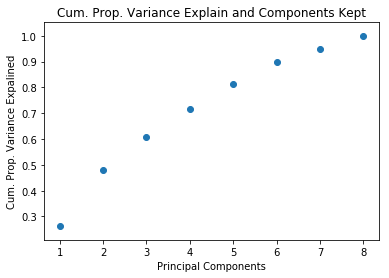

In [17]:
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

In [18]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

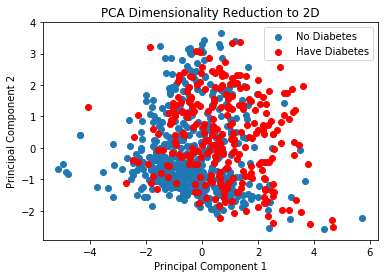

In [20]:
negative = plt.scatter(Proj_data_2D[:,0][Y == 0], Proj_data_2D[:,1][Y == 0])

# Plot projected the data onto 2D (test positive for diabetes)
positive = plt.scatter(Proj_data_2D[:,0][Y == 1], Proj_data_2D[:,1][Y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])

# Show scatter plot
plt.show()

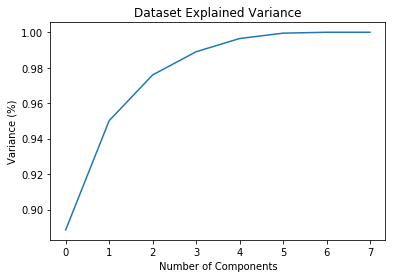

In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as sklearnPCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [29]:
##########      KERNEL PCA       ##########
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = scikit_kpca.fit_transform(X)


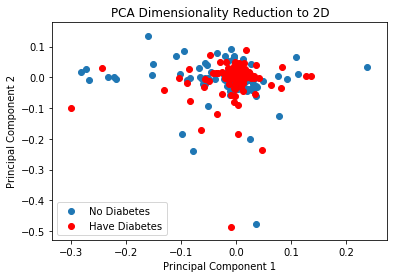

In [30]:
negative = plt.scatter(X_kpca[:,0][Y == 0], X_kpca[:,1][Y == 0])

# Plot projected the data onto 2D (test positive for diabetes)
positive = plt.scatter(X_kpca[:,0][Y == 1], X_kpca[:,1][Y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])

# Show scatter plot
plt.show()

In [34]:
# we have to always check whether data is best represented by linear principal components 
#or by non-linear principal components
y=Y

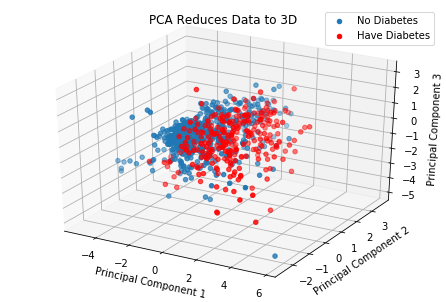

In [35]:
from mpl_toolkits.mplot3d import Axes3D
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)
# Visualize data in 3D

# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for diabetes)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for diabetes)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])

# Show 3D plot
plt.show()


In [40]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
Proj_data_3D = scikit_kpca.fit_transform(X)


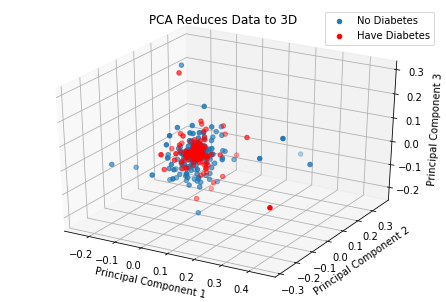

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for diabetes)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for diabetes)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["No Diabetes", "Have Diabetes"])

# Show 3D plot
plt.show()


In [42]:
#clearly non-linear principal components are not helping so we stick to linear principal components in this case